In [70]:
import pycbc.noise
from pycbc.noise import noise_from_psd
import pycbc.psd
import pylab as pp
import pycbc.filter as pfliter
from pycbc.waveform import get_td_waveform
from avro import schema, datafile, io
from avro.datafile import DataFileReader
from avro.io import DatumReader
import random

In [71]:
m1 = 10
m2 = 10
freq = 2048
delta_t = 1.0 / 2048
delta_f = 1.0 / 2048
flow = 30.0

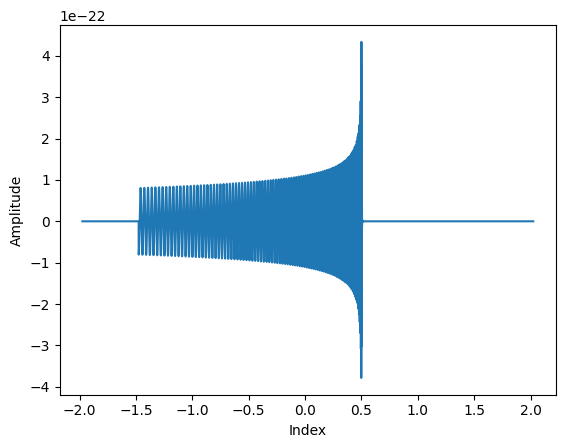

In [72]:
hp, hc = get_td_waveform(
    approximant="IMRPhenomT", mass1=m1, mass2=m2, delta_t=delta_t, f_lower=30
)

hp.resize(8192)
hc.resize(8192)
hp.roll(len(hp) // random.randint(2, 19))
hp.cyclic_time_shift(hp.start_time)
scale = 500
hp /= scale

pp.plot(hp.sample_times, hp)
pp.ylabel("Amplitude")
pp.xlabel("Index")
pp.show()

noise = 


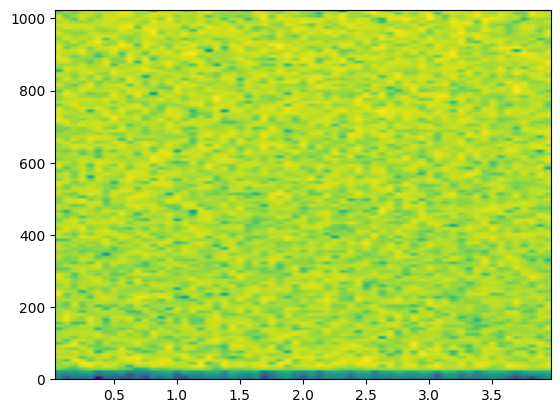

signal = 


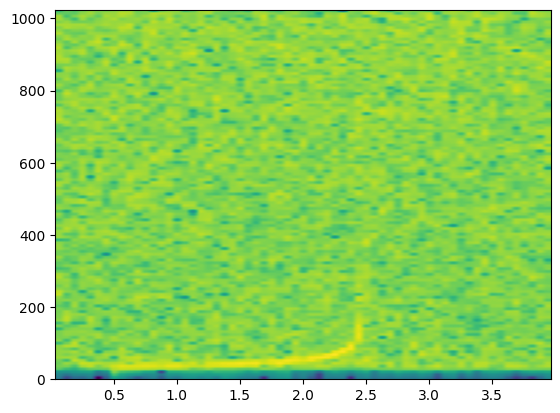

In [74]:
l = 0
while l < 1:

    flen = int(freq / delta_f) + 1
    psd = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)

    noisesamples = int(4 / delta_t)
    noise = noise_from_psd(noisesamples, delta_t, psd, seed=l)
    print("noise = ")
    pp.specgram(noise, Fs=1.0 / delta_t)
    pp.show()

    noise._epoch = hp._epoch
    signal = noise + hp

    print("signal = ")
    pp.specgram(signal, Fs=1.0 / delta_t)
    pp.show()
    l += 1